# Neural network development for turbulence modeling in URANS simulations of non-Newtonian media slope flows

URANS mathematical model:
\begin{equation}
	\label{vof}
	\left\{
		\begin{aligned}
			&\boldsymbol{\nabla} \cdot \bar{\boldsymbol{u}} = 0,\\
			&\frac{\partial \bar{\alpha}}{\partial t} + \boldsymbol{\nabla} \cdot (\bar{\boldsymbol{u}} \bar{\alpha}) = 0,\\
			&\frac{\partial (\rho \bar{\boldsymbol{u}})}{\partial t} + \boldsymbol{\nabla} \cdot (\rho \bar{\boldsymbol{u}} \bar{\boldsymbol{u}}) = -\boldsymbol{\nabla} \bar{p} + \boldsymbol{\nabla} \cdot \bar{\boldsymbol{\tau}} + \rho \bar{\boldsymbol{f}}.
		\end{aligned}
	\right.
\end{equation}
Here $\bar{\boldsymbol{u}}$ is the speed of the mixture, horizontal bar means Reynolds averaging, $\bar{\alpha}$ is the volume fraction of the selected phase, $\bar{\boldsymbol{\tau}} = \bar{\boldsymbol{\tau}}_{Re} + \bar{\boldsymbol{\tau}}_m$ is the stress tensor calculated as sum of Reynolds stress tensor and viscous stress tensor, $\bar{\boldsymbol{\tau}}_m = 2 \mu \bar{\boldsymbol{s}}$ is the viscous stress tensor, which is a function of the strain rate tensor $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$, $\mu = \nu \rho$ is dynamic viscosityof a mixture which is calculated as a product of density and kinematic viscosity of mixture, $\nu = \nu_1 \bar{\alpha} + \nu_0 (1 -\bar{\alpha})$ is the kinemsatic viscosity of mixture calculated according to the principle of the weighted average, $\nu_0$ is a constant, $\nu_1 = min (\nu_*, (\tau_* + K \dot{\gamma}^n) / \dot{\gamma})$ is Herschel-Bulkley reology ratio, $\rho = \rho_1 \bar{\alpha} + \rho_0 (1 - \bar{\alpha})$ is the mixture density, $\rho_0$ and $\rho_1$ are constants, $\bar{p}$ is the pressure, $\bar{\boldsymbol{f}}$ is the density of the body forces.

The $\bar{\boldsymbol{\tau}}_{Re}$ Reynolds stress tensor is calculetaed using Tensor Basis Neural Network (TBNN) according to the principle presented in the work of Pope [1]. It is presented as function of strain rate $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ and rotation rate $\bar{\boldsymbol{r}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} - (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ tensors, and 10 their isotropic combinations $T^i$ and 5 invariants $\lambda_i$. Calculations performed for normalized tensors $\bar{\tau}_{Re}'$, $\bar{\boldsymbol{s}}'$, $\bar{\boldsymbol{r}}'$. The scaling parameters $U_0$, $h_0$, $\rho$ used for normalization:

\begin{equation}
	\label{norm}
	\left\{
		\begin{aligned}
			&\bar{\boldsymbol{\tau}}_{Re} = \bar{\boldsymbol{\tau}}_{Re}' \rho U_0 h_0,\\
			&\bar{\boldsymbol{s}} = \bar{\boldsymbol{s}}' U_0^2 / h_0,\\
			&\bar{\boldsymbol{r}} = \bar{\boldsymbol{r}}' U_0^2 / h_0.
		\end{aligned}
	\right.
\end{equation}

In what follows, we omit the apostrophe symbol and keep in mind that we are considering normalized tensors.

Normalized Reynolds stress tensor is

\begin{equation}
	\label{MLReynolds}
	\bar{\boldsymbol{\tau}}_{Re} = \sum\limits_{n=1}^{10} g^{(n)} (\lambda_1, ... , \lambda_5) \boldsymbol{T}^{(n)}.
\end{equation}

\begin{equation}
	\begin{aligned}
		&\boldsymbol{T}^{(1)} = \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(6)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} + \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \frac{2}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(2)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} - \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(7)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} \bar{\boldsymbol{r}},\\
		&\boldsymbol{T}^{(3)} = \bar{\boldsymbol{s}}^2 - \frac{1}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2),
		&&\boldsymbol{T}^{(8)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},\\
		&\boldsymbol{T}^{(4)} = \bar{\boldsymbol{r}}^2 - \frac{1}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{r}}^2),
		&&\boldsymbol{T}^{(9)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 + \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \frac{2}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(5)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
		&&\boldsymbol{T}^{(10)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
	\end{aligned}
\end{equation}
\begin{equation}
	\lambda_1 = Tr(\bar{\boldsymbol{s}}^2),\ \ \ \ \lambda_2 = Tr(\bar{\boldsymbol{r}}^2),\ \ \ \ \lambda_3 = Tr(\bar{\boldsymbol{s}}^3),\ \ \ \ \lambda_4 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}),\ \ \ \ \lambda_5 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2).
\end{equation}

Calculations performed for turbulent flow in inclined chute with the rectangular cross-section. Scheme of flow is shown in figure below.

<div>
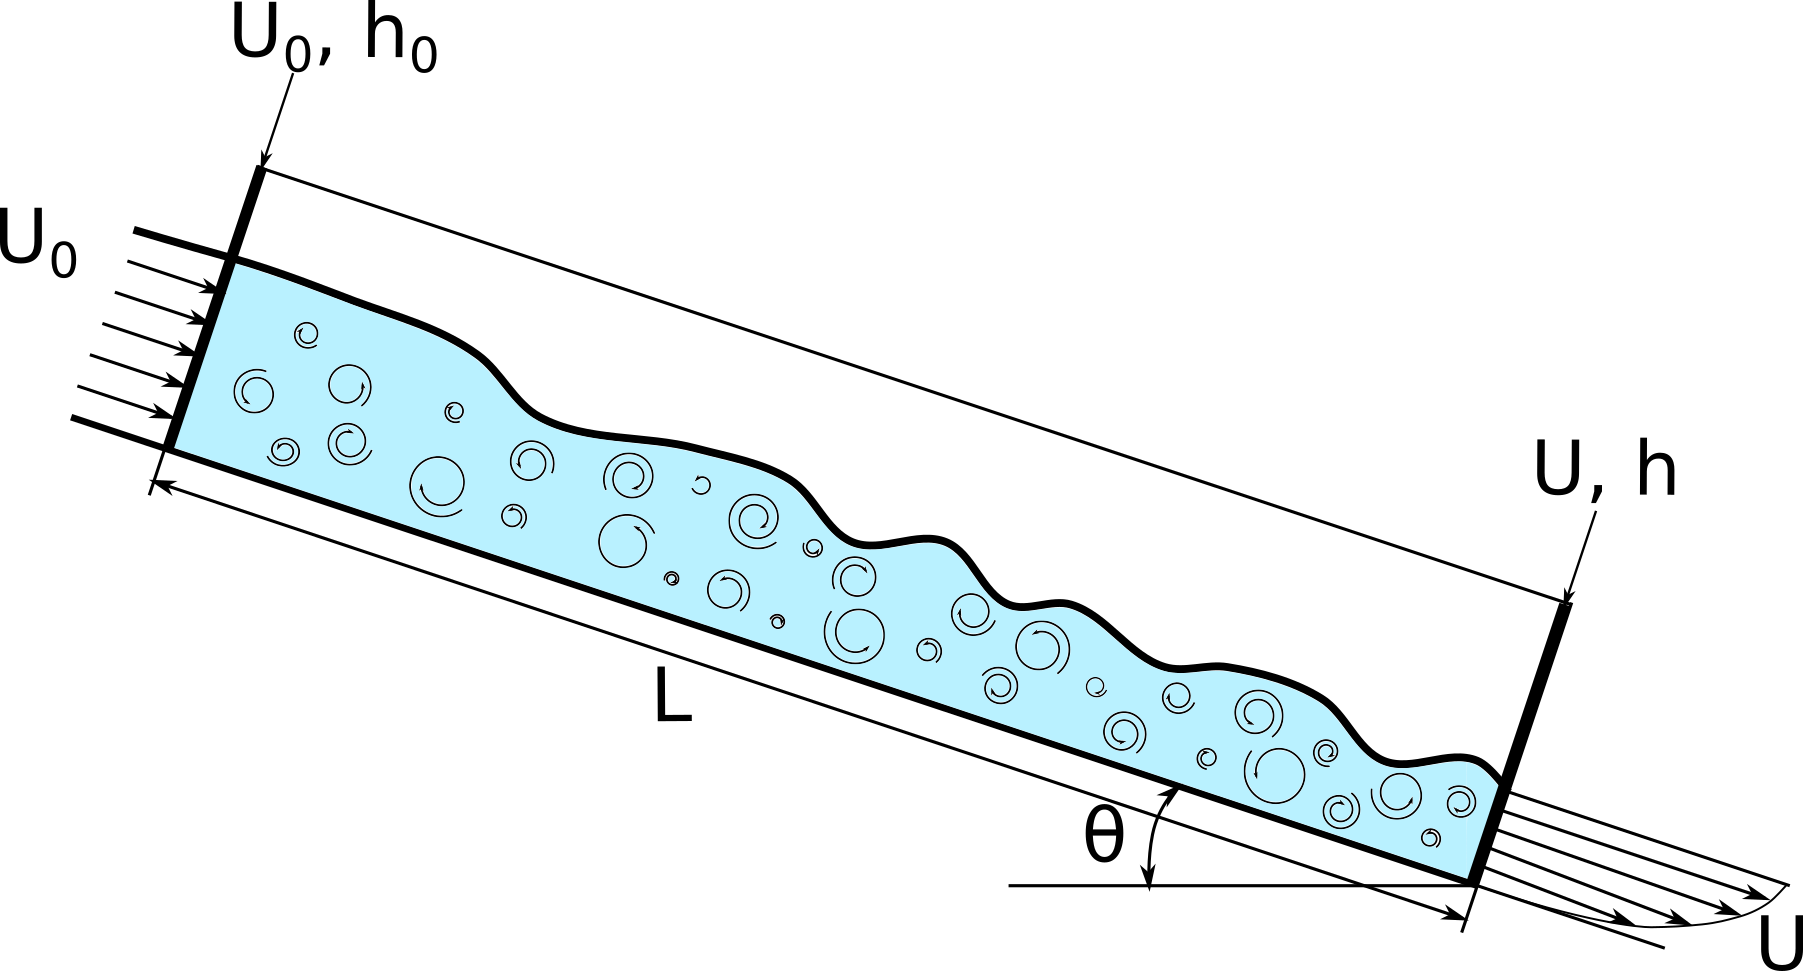
</div>

In the considered flow
\begin{equation}
    U_0 = 0.4\ \text{m}/\text{s},\ \ \ h_0 = 0.01\ \text{m},\ \ \ \theta = 25^\circ,\ \ \ L = 0.1\ \text{m}.
\end{equation}

Reynolds number of flow is 
\begin{equation}
    \text{Re} = U_0 h_0 / \nu_{eff},
\end{equation}

\begin{equation}
    \nu_{eff} = \frac{\tau_* + K (U_0/h_0)^n}{\rho (U_0 / h_0)}.
\end{equation}

Constants in calculation are set as follows:

\begin{equation}
    \nu_* = 10^7\ \text{m}^2/\text{s},\ \ \ \tau_* = 2 \cdot 10^{-3}\ \text{m}^2/\text{s}^2,\ \ \ K = 10^{-4}\ \text{m}^2/\text{s},\ \ \ n = 0.8,\ \ \ \rho = 100\ \text{kg}/\text{m}^3.
\end{equation}

So effective viscosity and Reynolds number are:

\begin{equation}
    \nu_{eff} = 10^{-6}\ \text{m}^2/\text{s},\ \ \ \text{Re} = 4000.
\end{equation}

The mesh cell linear size must be $dx = \frac{h_0}{\text{Re}^{3/4}} = 2 \cdot 10^{-5}$. Time step $dt = 5 \cdot 10^{-5}$.

Mesh size for computational domain size of 0.1x0.011x0.002 m$^3$ is $27.5 \cdot 10^7$.

[1] S. B. Pope. A more general effective-viscosity hypothesis.Journal of Fluid Mechanics,72(2):331–340, 1975.

## Current research

Above was global formulation for TBNN (Tensor Based Neural Network) with implemengtation into mathematical model. Now let's try to realize ML-turbulence model as a correction step for variables $\bar{\boldsymbol{u}}$, $\bar{\alpha}$, $\bar{p}$.

Will use tensors $\boldsymbol{T}^{(i)}$, invariants $\lambda_i$ and variables $\bar{\boldsymbol{u}}$, $\bar{p}$, $\bar{\alpha}$ as a features of NN (Neural Network). As a targets will be the differenses between DNS and RANS values for $\boldsymbol{u}$, $\alpha$ and $p$.

Let's start with importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.7.0


In [2]:
def timeStepsList():
	timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
	index = np.argsort(timeStepsList.astype(np.float))
	timeStepsList = timeStepsList[index]
	return timeStepsList[1:-2]

In [3]:
def readTensor(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'3', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr
#	return arr[[fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'4',\
#                   fileName[0]+'5', fileName[0]+'8']]

In [4]:
def readVector(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [5]:
def readScalar(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.columns = [fileName[0]]
	arr.loc[:] = arr.loc[:].astype(float)
	return arr

In [6]:
def formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size):
	data = pd.DataFrame()
	for time in TSL:
		kwargs = {'folder':folder, 'time':time, 'sz':size}
		scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
		vectors = FsVectors.apply(readVector, axis=1, **kwargs)
		tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
		tmp = pd.concat(list(scalars[:])+list(vectors[:])+list(tensors[:]), axis=1)
		data = data.append(tmp, ignore_index=True)
	return data

Below all fiatures listed. alpha.water is $\bar{\alpha}$, 'alpha.water', 'U' and 'p_rgh' are initial values. Parameters from res/ folder are calculated without turbulence model using base interFoam solver. 'Uref', 'AWref' and 'p_rghref' are reference values calculated using DNS data.

In [7]:
TSL = timeStepsList()
lenTSL = len(TSL)
folder = 'TIF'
deltaT = 1e-06
size = 27500
FsScalars = pd.DataFrame([['alpha.water'], ['res/alpha.water'], ['res/AWref'], ['p_rgh'], ['res/p_rgh'],\
                          ['res/p_rghref'], ['res/I0'], ['res/I1'], ['res/I2'], ['res/I3'], ['res/I4']])
FsVectors = pd.DataFrame([['U'], ['res/U'], ['res/Uref']])
FsTensors = pd.DataFrame([['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], \
                          ['res/T6'], ['res/T7'], ['res/T8'], ['res/T9']])

In [8]:
data = formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size)
data['dU0'] = data['res/Uref0'] - data['res/U0']
data['dU1'] = data['res/Uref1'] - data['res/U1']
data['dU2'] = data['res/Uref2'] - data['res/U2']
data['dAW'] = data['res/AWref'] - data['res/alpha.water']
data['dp'] = data['res/p_rghref'] - data['res/p_rgh']
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alpha.water,495000.0,3.799996e-05,0.000967,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.036012
res/alpha.water,495000.0,4.198475e-05,0.001046,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.038069
res/AWref,495000.0,4.199996e-05,0.001047,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.038014
p_rgh,495000.0,1.524087e-01,0.434164,-0.000038,5.814844e-05,1.222861e-03,5.258507e-02,12.030733
res/p_rgh,495000.0,-8.251814e+00,2.673023,-16.154904,-9.121784e+00,-7.667027e+00,-6.403329e+00,11.901613
...,...,...,...,...,...,...,...,...
dU0,495000.0,-5.360258e-05,0.000777,-0.032736,2.048619e-07,6.151747e-06,1.039315e-04,0.021700
dU1,495000.0,1.034337e-06,0.000779,-0.064109,-6.685824e-10,-2.191249e-11,5.918425e-10,0.064140
dU2,495000.0,-3.596689e-06,0.000754,-0.005587,5.891274e-09,1.225423e-07,1.913233e-06,0.064393
dAW,495000.0,1.521625e-08,0.000002,-0.000078,0.000000e+00,0.000000e+00,0.000000e+00,0.000124


In [9]:
features = data.copy()
labels = features[['dU0', 'dU1', 'dU2', 'dAW', 'dp']].copy()
features = features.drop(['dU0', 'dU1', 'dU2', 'dAW', 'dp'], axis=1)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,\
                                                                            test_size=0.33, random_state=42)

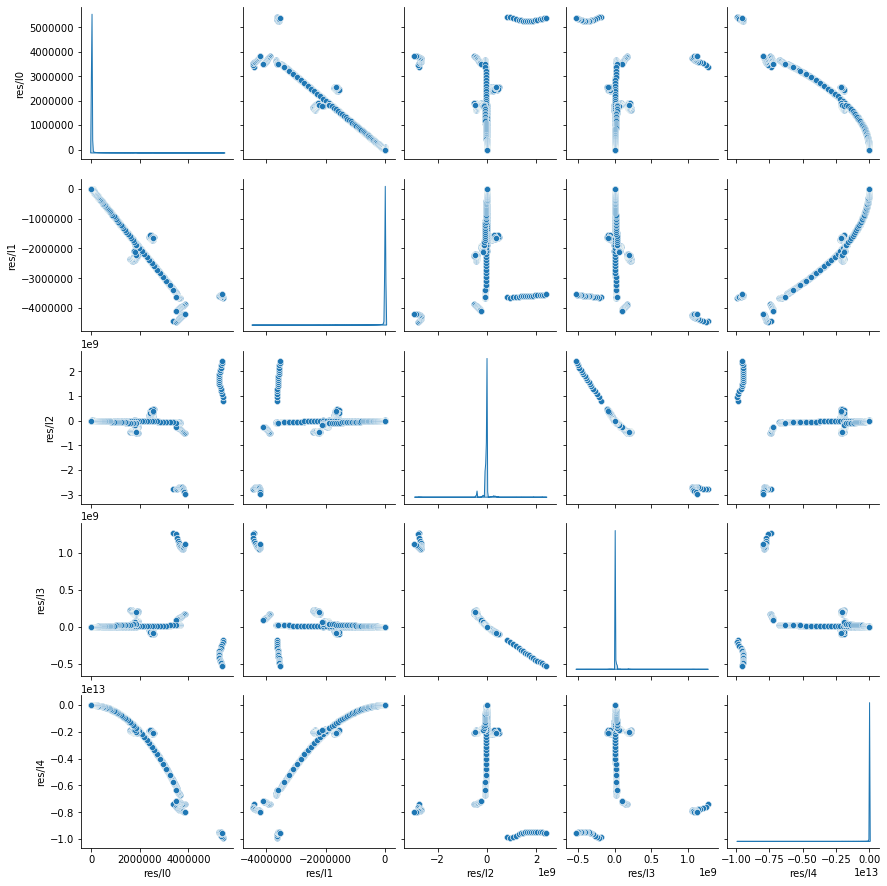

In [10]:
sns.pairplot(data[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']], diag_kind='kde')

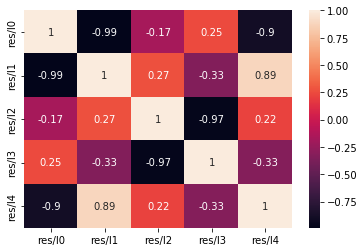

In [11]:
sns.heatmap(data[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']].corr(), annot = True)

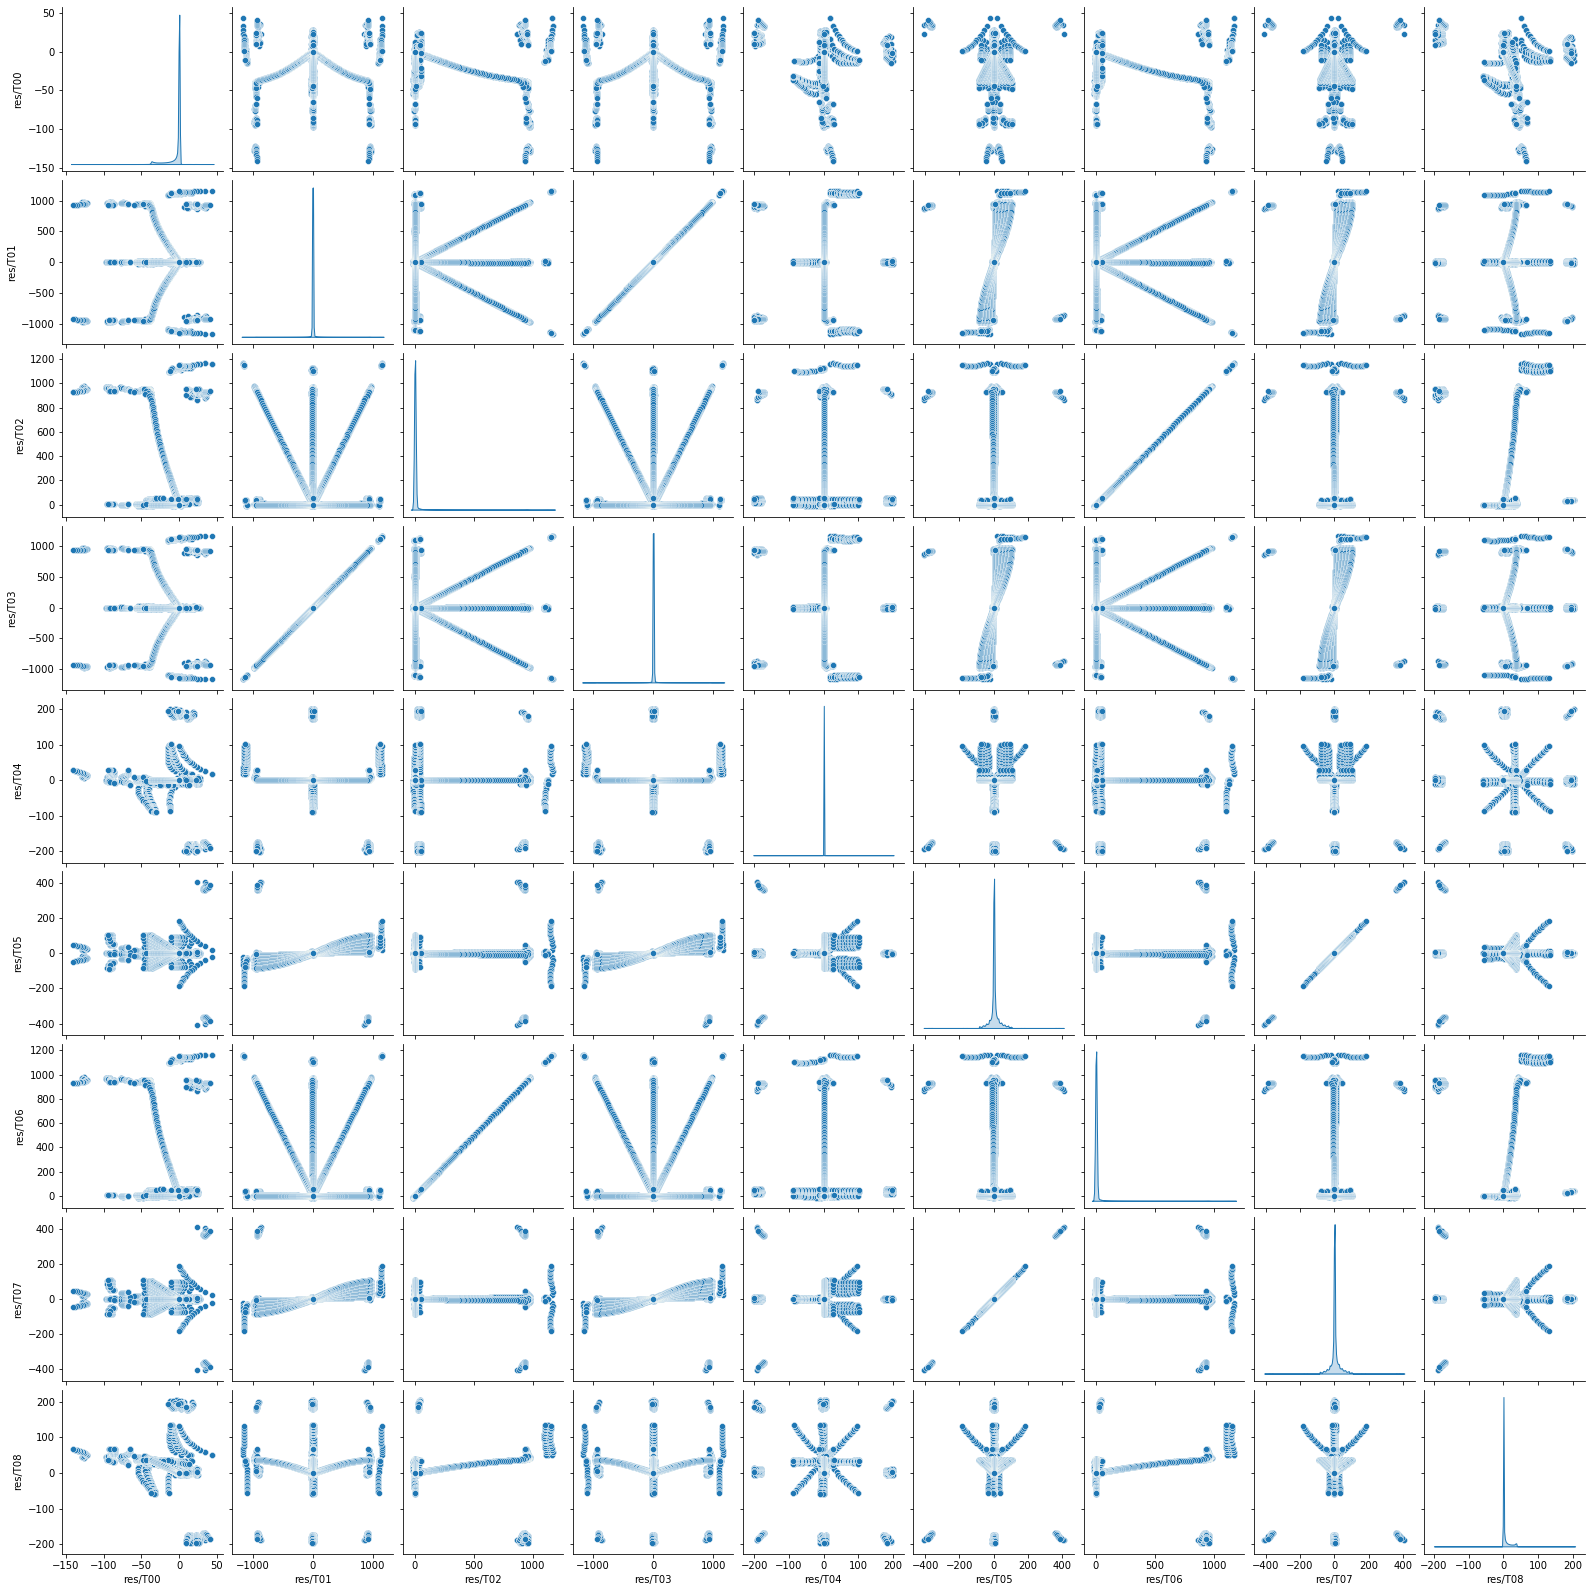

In [12]:
sns.pairplot(data[['res/T00', 'res/T01', 'res/T02', 'res/T03', 'res/T04',\
                   'res/T05', 'res/T06', 'res/T07', 'res/T08']], diag_kind='kde')

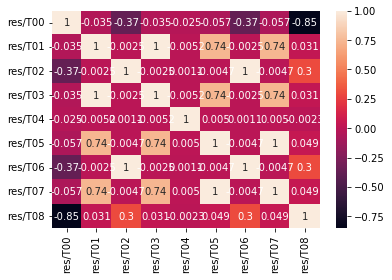

In [13]:
sns.heatmap(data[['res/T00', 'res/T01', 'res/T02', 'res/T03', 'res/T04',\
                  'res/T05', 'res/T06', 'res/T07', 'res/T08']].corr(), annot = True)

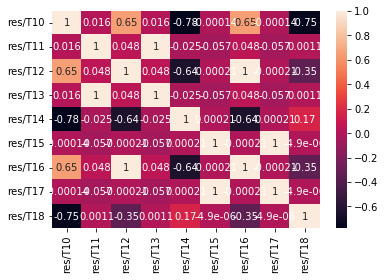

In [14]:
sns.heatmap(data[['res/T10', 'res/T11', 'res/T12', 'res/T13', 'res/T14',\
                  'res/T15', 'res/T16', 'res/T17', 'res/T18']].corr(), annot = True)

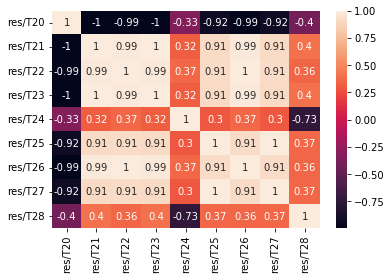

In [15]:
sns.heatmap(data[['res/T20', 'res/T21', 'res/T22', 'res/T23', 'res/T24',\
                  'res/T25', 'res/T26', 'res/T27', 'res/T28']].corr(), annot = True)

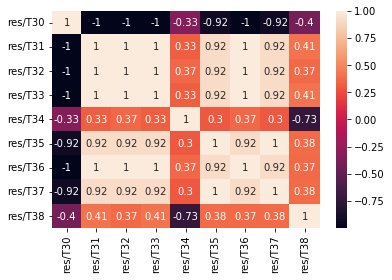

In [16]:
sns.heatmap(data[['res/T30', 'res/T31', 'res/T32', 'res/T33', 'res/T34',\
                  'res/T35', 'res/T36', 'res/T37', 'res/T38']].corr(), annot = True)

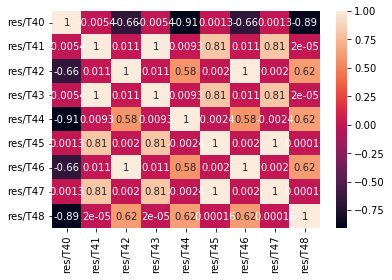

In [17]:
sns.heatmap(data[['res/T40', 'res/T41', 'res/T42', 'res/T43', 'res/T44',\
                  'res/T45', 'res/T46', 'res/T47', 'res/T48']].corr(), annot = True)

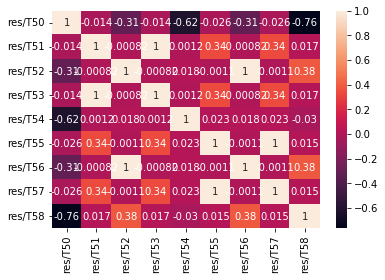

In [18]:
sns.heatmap(data[['res/T50', 'res/T51', 'res/T52', 'res/T53', 'res/T54',\
                  'res/T55', 'res/T56', 'res/T57', 'res/T58']].corr(), annot = True)

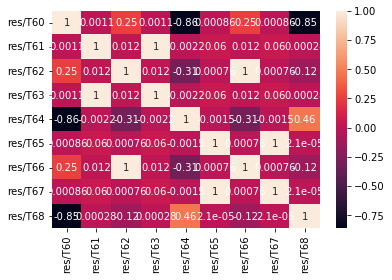

In [19]:
sns.heatmap(data[['res/T60', 'res/T61', 'res/T62', 'res/T63', 'res/T64',\
                  'res/T65', 'res/T66', 'res/T67', 'res/T68']].corr(), annot = True)

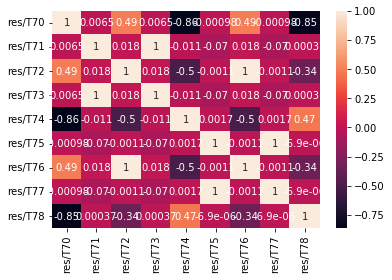

In [20]:
sns.heatmap(data[['res/T70', 'res/T71', 'res/T72', 'res/T73', 'res/T74',\
                  'res/T75', 'res/T76', 'res/T77', 'res/T78']].corr(), annot = True)

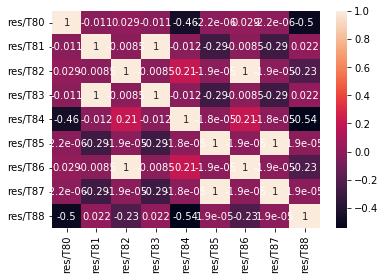

In [21]:
sns.heatmap(data[['res/T80', 'res/T81', 'res/T82', 'res/T83', 'res/T84',\
                  'res/T85', 'res/T86', 'res/T87', 'res/T88']].corr(), annot = True)

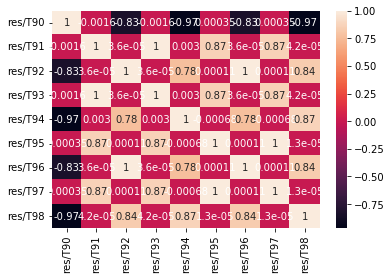

In [22]:
sns.heatmap(data[['res/T90', 'res/T91', 'res/T92', 'res/T93', 'res/T94',\
                  'res/T95', 'res/T96', 'res/T97', 'res/T98']].corr(), annot = True)

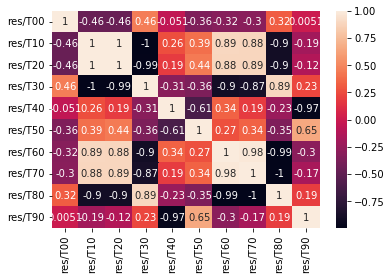

In [23]:
sns.heatmap(data[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                  'res/T60', 'res/T70', 'res/T80', 'res/T90']].corr(), annot = True)

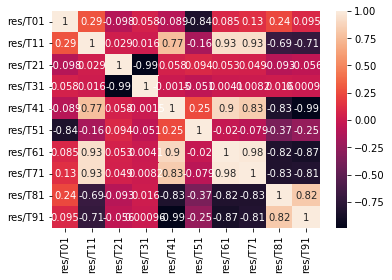

In [24]:
sns.heatmap(data[['res/T01', 'res/T11', 'res/T21', 'res/T31', 'res/T41', 'res/T51',\
                  'res/T61', 'res/T71', 'res/T81', 'res/T91']].corr(), annot = True)

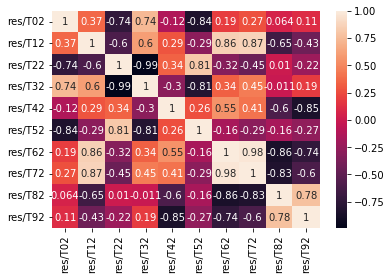

In [25]:
sns.heatmap(data[['res/T02', 'res/T12', 'res/T22', 'res/T32', 'res/T42', 'res/T52',\
                  'res/T62', 'res/T72', 'res/T82', 'res/T92']].corr(), annot = True)

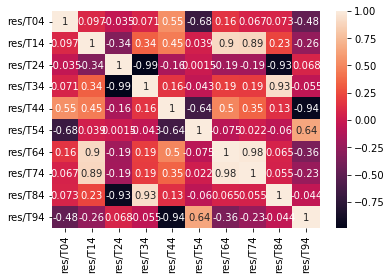

In [26]:
sns.heatmap(data[['res/T04', 'res/T14', 'res/T24', 'res/T34', 'res/T44', 'res/T54',\
                  'res/T64', 'res/T74', 'res/T84', 'res/T94']].corr(), annot = True)

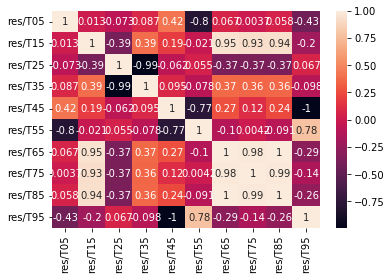

In [27]:
sns.heatmap(data[['res/T05', 'res/T15', 'res/T25', 'res/T35', 'res/T45', 'res/T55',\
                  'res/T65', 'res/T75', 'res/T85', 'res/T95']].corr(), annot = True)

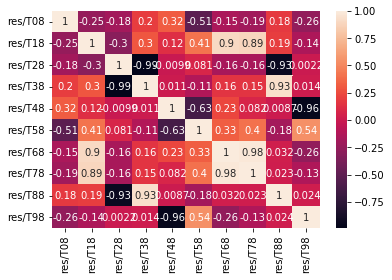

In [28]:
sns.heatmap(data[['res/T08', 'res/T18', 'res/T28', 'res/T38', 'res/T48', 'res/T58',\
                  'res/T68', 'res/T78', 'res/T88', 'res/T98']].corr(), annot = True)

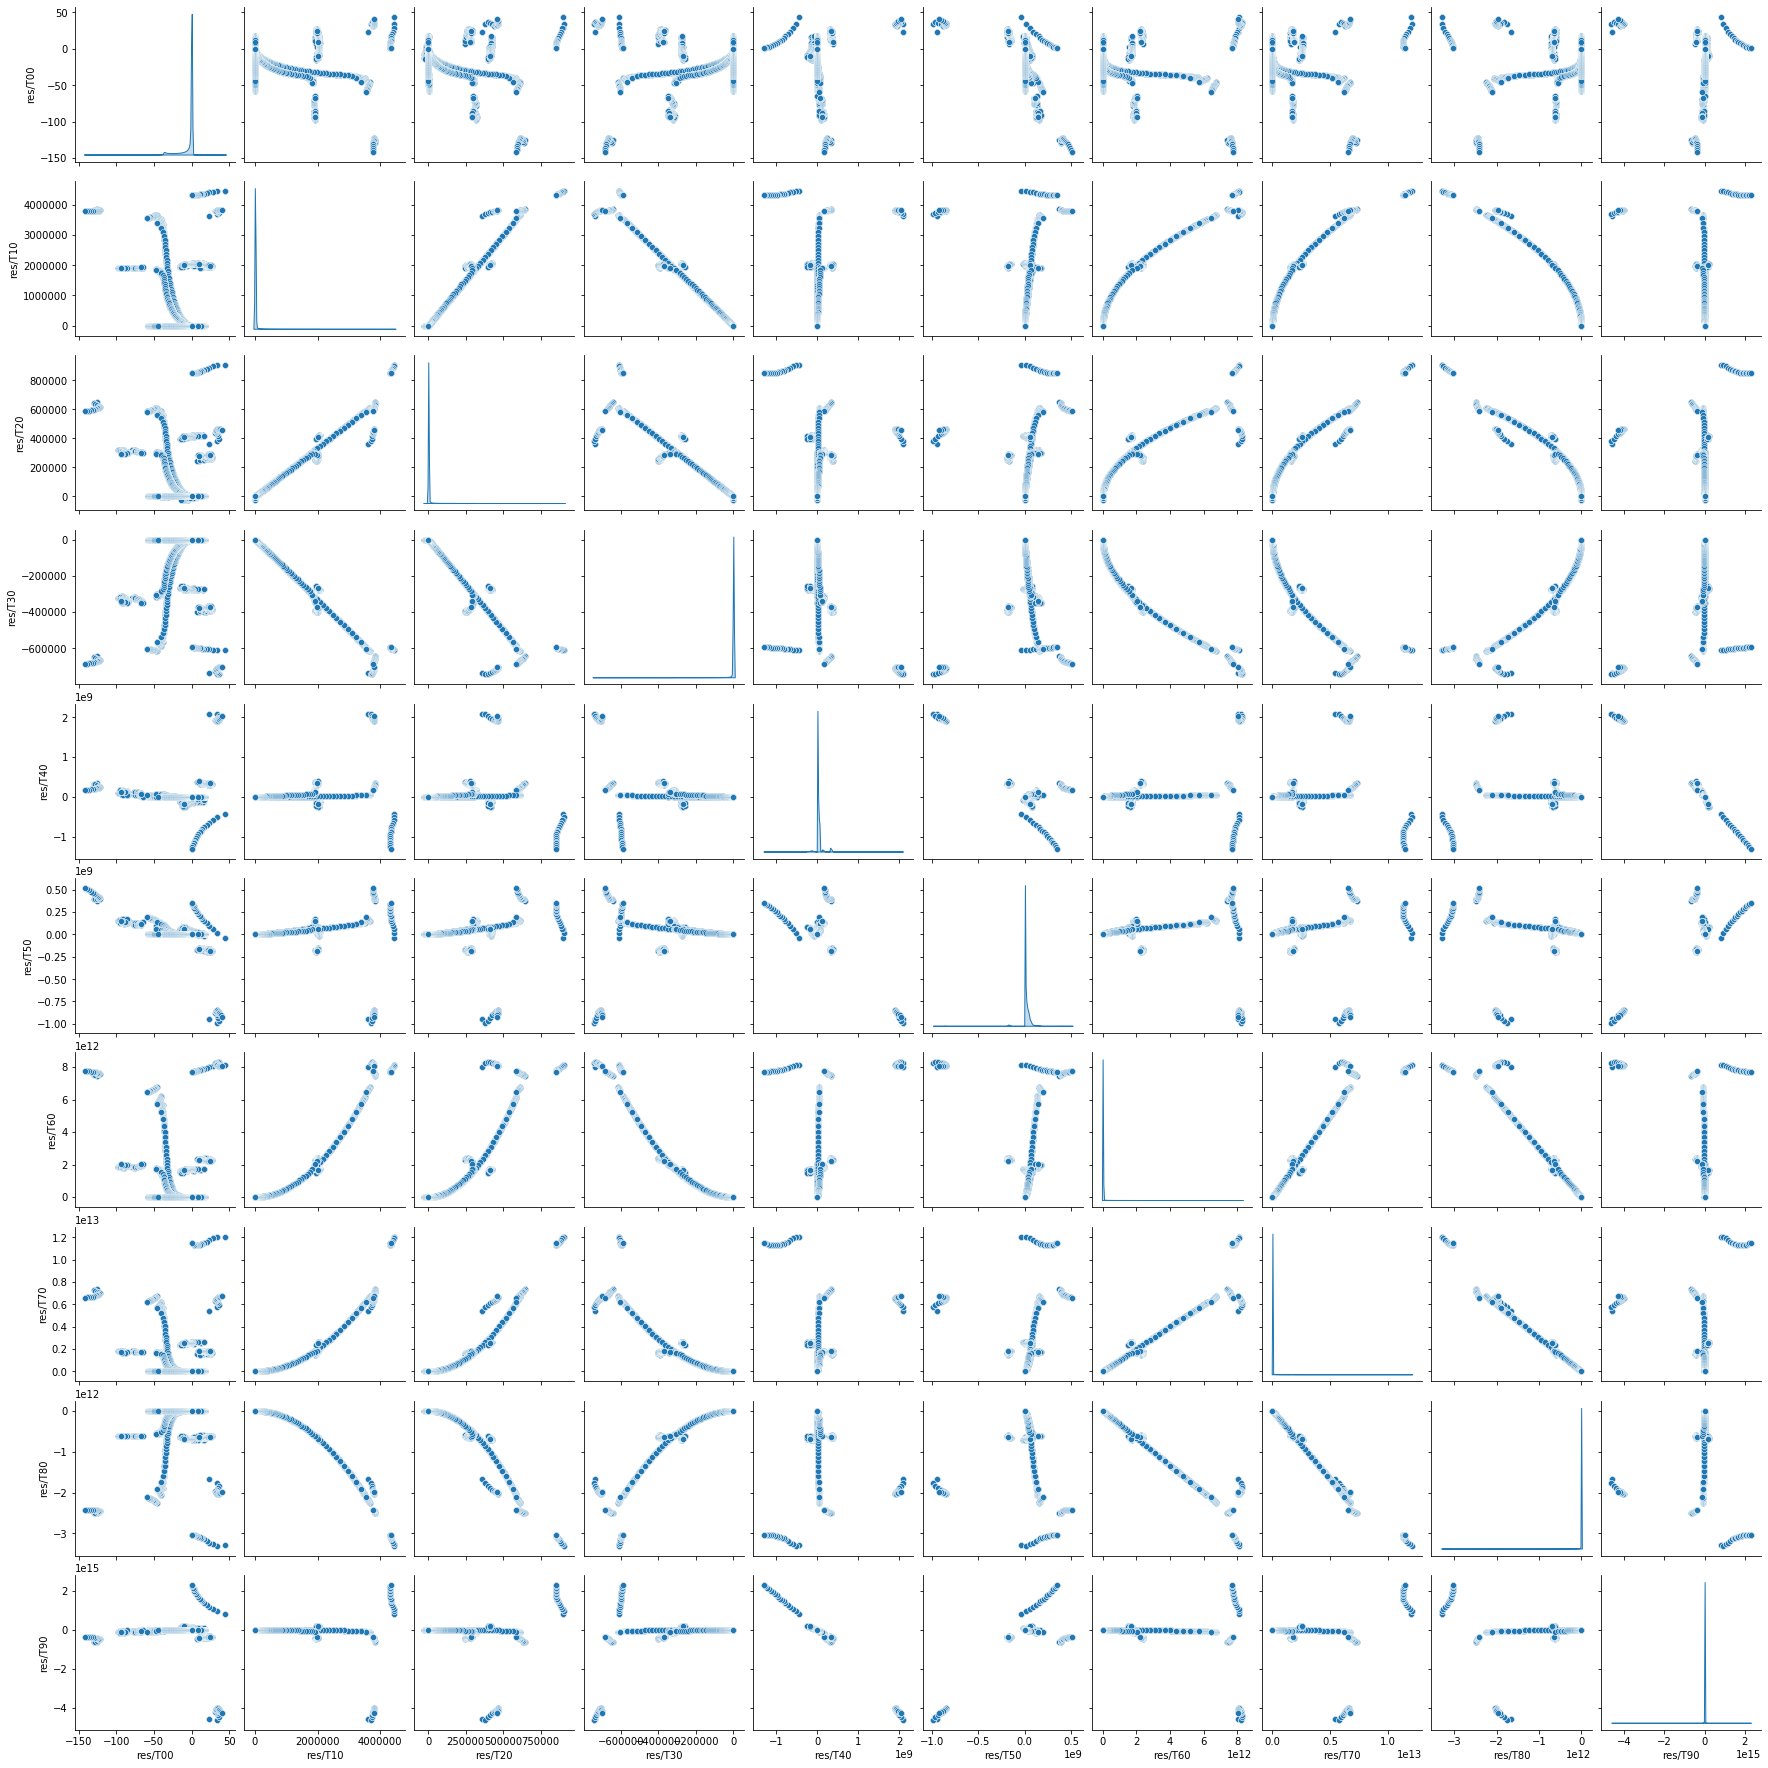

In [29]:
sns.pairplot(data[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                   'res/T60', 'res/T70', 'res/T80', 'res/T90']], diag_kind='kde')

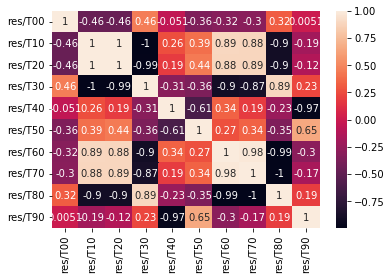

In [30]:
sns.heatmap(data[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                  'res/T60', 'res/T70', 'res/T80', 'res/T90']].corr(), annot = True)

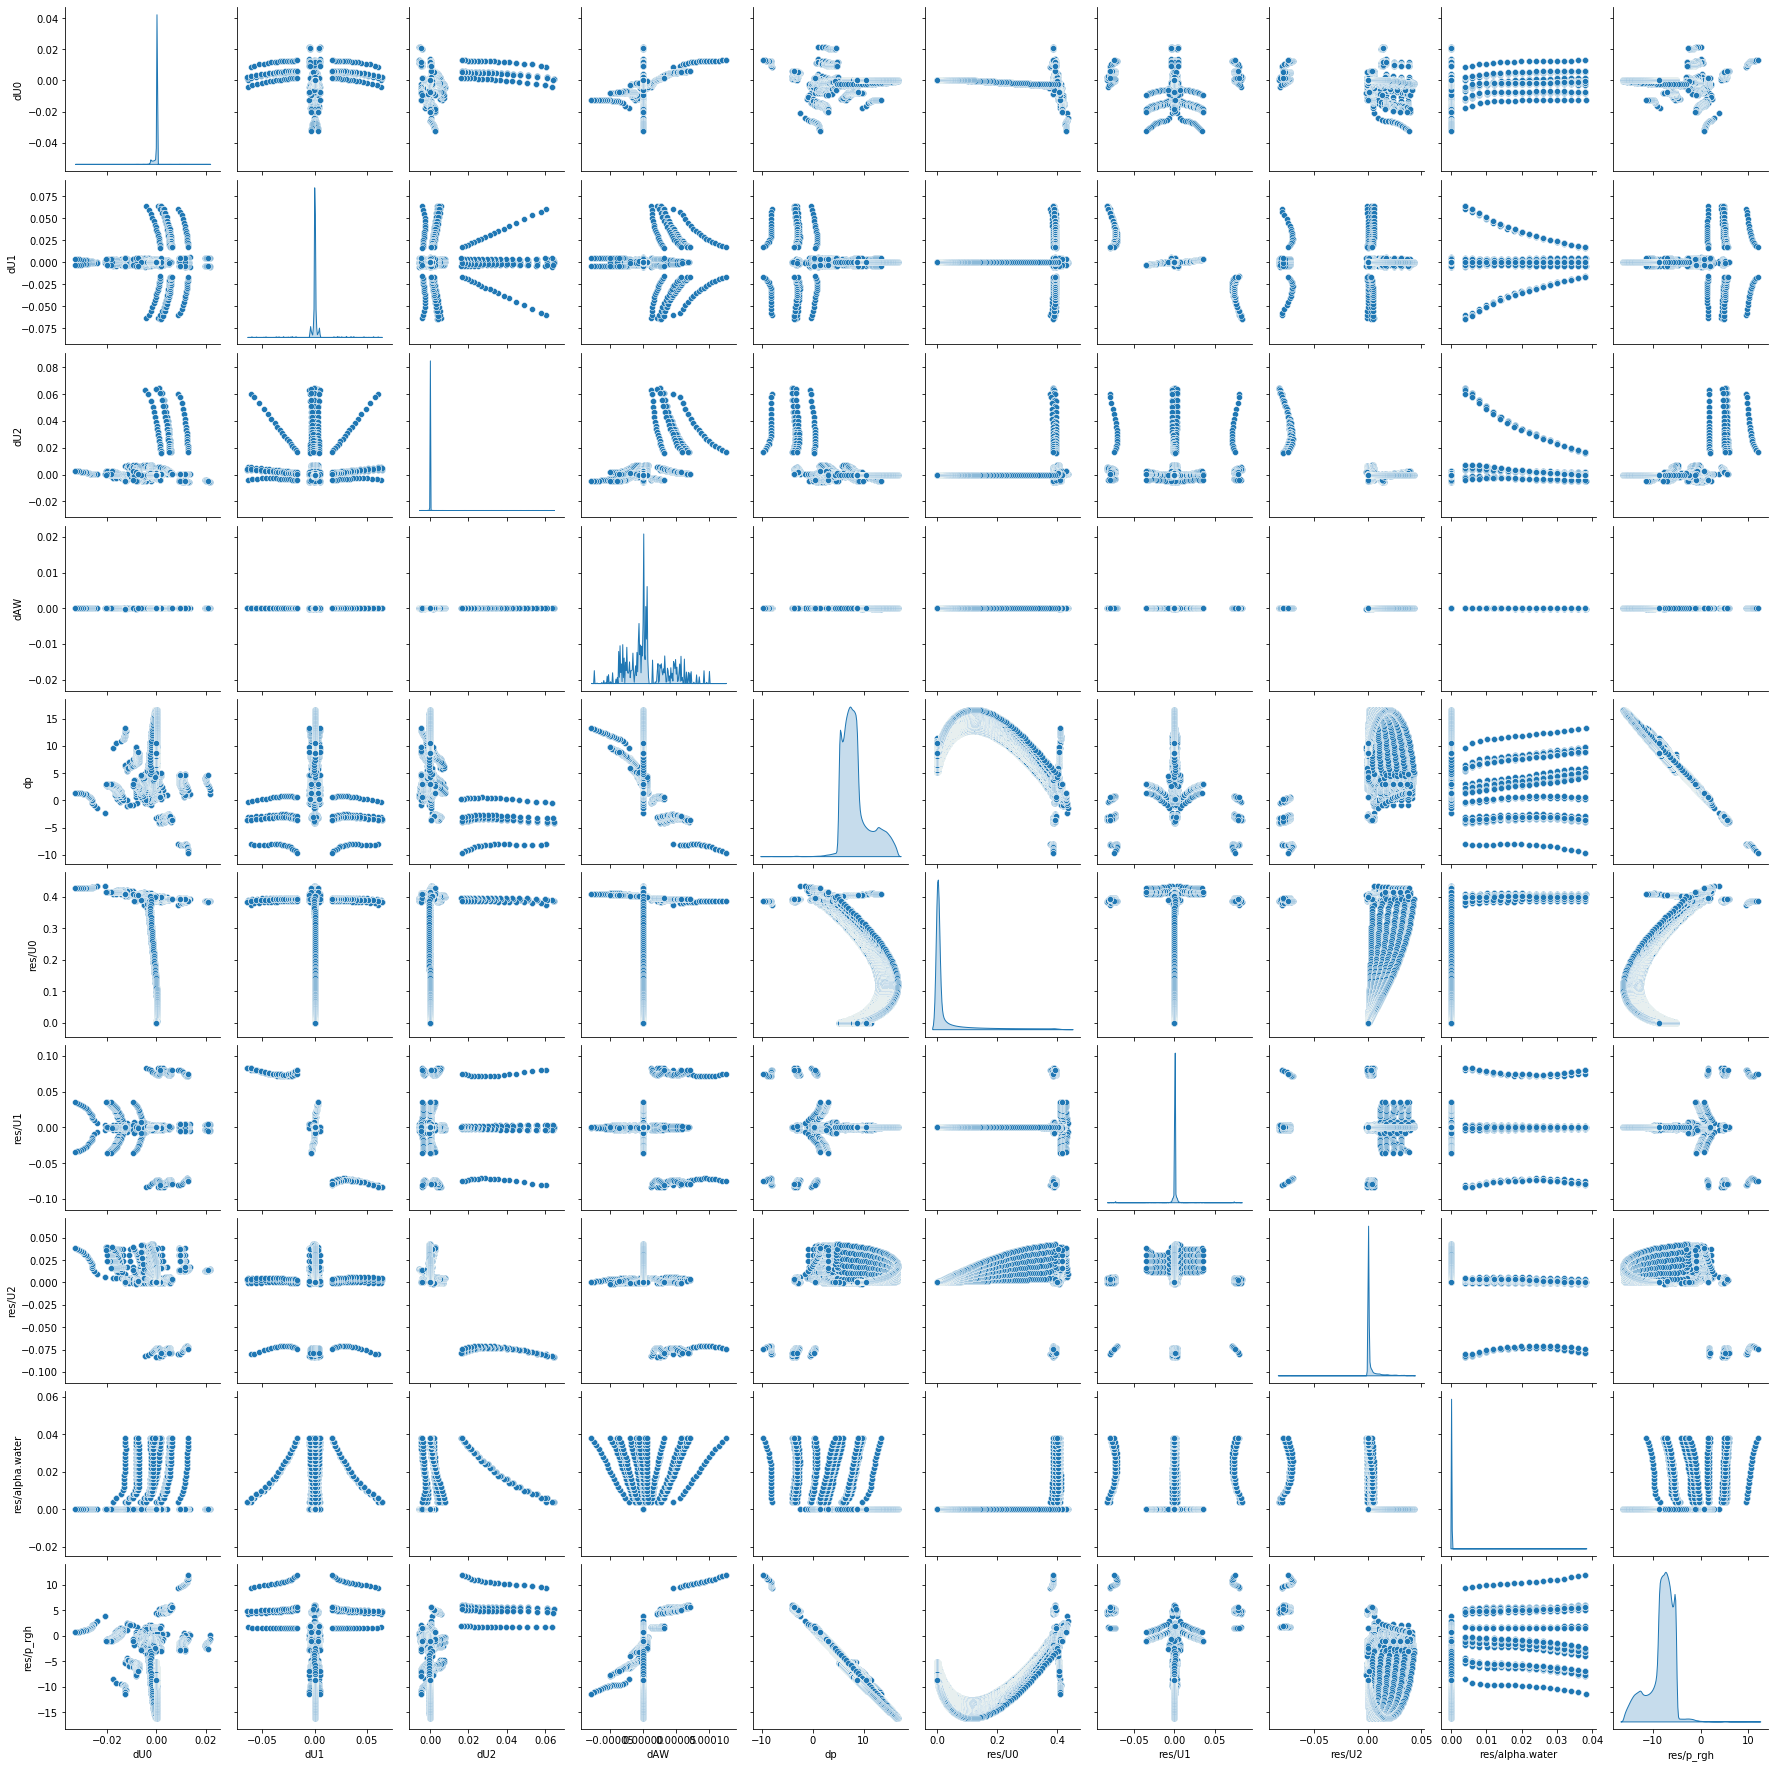

In [31]:
sns.pairplot(data[['dU0', 'dU1', 'dU2', 'dAW', 'dp',\
                   'res/U0', 'res/U1', 'res/U2', 'res/alpha.water', 'res/p_rgh']], diag_kind='kde')

In [32]:
dU0TargetCorr = data.corr()['dU0']
print(dU0TargetCorr[dU0TargetCorr.abs()>0.3])
print(dU0TargetCorr[dU0TargetCorr.abs()<0.1])

p_rgh          -0.504640
res/p_rghref   -0.563051
res/I0         -0.519809
res/I1          0.453845
res/I2         -0.301142
res/I4          0.439766
U0             -0.576676
U2             -0.468015
res/U0         -0.583154
res/U2         -0.469945
res/Uref0      -0.576570
res/Uref2      -0.470996
res/T00         0.503788
res/T02        -0.332409
res/T04        -0.366751
res/T06        -0.332409
res/T08        -0.637765
res/T10        -0.486733
res/T12        -0.529785
res/T14         0.378751
res/T16        -0.529785
res/T18         0.364718
res/T20        -0.524828
res/T21         0.516444
res/T22         0.485047
res/T23         0.516444
res/T25         0.477602
res/T26         0.485047
res/T27         0.477602
res/T30         0.453005
res/T31        -0.453804
res/T32        -0.447925
res/T33        -0.453804
res/T35        -0.418007
res/T36        -0.447925
res/T37        -0.418007
res/T48        -0.304003
res/T50        -0.465542
res/T52         0.358239
res/T56         0.358239


In [33]:
dU1TargetCorr = data.corr()['dU1']
print(dU1TargetCorr[dU1TargetCorr.abs()>0.3])
print(dU1TargetCorr[dU1TargetCorr.abs()<0.1])

U1          -0.613250
res/U1      -0.874491
res/Uref1   -0.625419
res/T11     -0.683546
res/T13     -0.683546
res/T41     -0.566190
res/T43     -0.566190
res/T45     -0.320848
res/T47     -0.320848
res/T51     -0.307029
res/T53     -0.307029
res/T61     -0.616441
res/T63     -0.616441
res/T71     -0.558566
res/T73     -0.558566
res/T81      0.570678
res/T83      0.570678
res/T91      0.482173
res/T93      0.482173
res/T95      0.336705
res/T97      0.336705
dU1          1.000000
Name: dU1, dtype: float64
alpha.water        0.023894
res/alpha.water    0.025111
res/AWref          0.025179
p_rgh              0.006378
res/p_rgh          0.007848
                     ...   
res/T98            0.000063
dU0                0.008136
dU2                0.006762
dAW                0.052255
dp                -0.006834
Name: dU1, Length: 79, dtype: float64


In [34]:
dU2TargetCorr = data.corr()['dU2']
print(dU2TargetCorr[dU2TargetCorr.abs()>0.3])
print(dU2TargetCorr[dU2TargetCorr.abs()<0.1])

res/alpha.water    0.303962
res/AWref          0.304642
res/I2            -0.463084
res/I3             0.544178
res/U2            -0.300336
res/T08           -0.389226
res/T12           -0.414683
res/T16           -0.414683
res/T40            0.508762
res/T42           -0.483435
res/T46           -0.483435
res/T48           -0.667680
res/T50           -0.480620
res/T58            0.601435
res/T62           -0.528142
res/T66           -0.528142
res/T68           -0.343497
res/T72           -0.435081
res/T76           -0.435081
res/T82            0.543671
res/T86            0.543671
res/T90           -0.472848
res/T92            0.493485
res/T94            0.336343
res/T96            0.493485
res/T98            0.582182
dU2                1.000000
dAW                0.534561
Name: dU2, dtype: float64
p_rgh           0.030840
res/p_rghref    0.023184
U0              0.014510
U1             -0.004313
res/U0          0.013903
res/U1         -0.006050
res/Uref0       0.015032
res/Uref1      

In [35]:
dAWTargetCorr = data.corr()['dAW']
print(dAWTargetCorr[dAWTargetCorr.abs()>0.3])
print(dAWTargetCorr[dAWTargetCorr.abs()<0.1])

res/I2    -0.592596
res/I3     0.659077
res/T04   -0.613418
res/T12   -0.307122
res/T16   -0.307122
res/T40    0.632344
res/T42   -0.629370
res/T44   -0.567618
res/T46   -0.629370
res/T48   -0.572619
res/T50   -0.548086
res/T54    0.467532
res/T58    0.314450
res/T60    0.312535
res/T62   -0.455975
res/T66   -0.455975
res/T72   -0.390866
res/T76   -0.390866
res/T82    0.506032
res/T86    0.506032
res/T90   -0.578602
res/T92    0.512814
res/T94    0.566290
res/T96    0.512814
res/T98    0.553225
dU2        0.534561
dAW        1.000000
Name: dAW, dtype: float64
p_rgh           0.049761
res/p_rghref    0.056285
U0              0.046671
U1             -0.051266
U2             -0.079215
res/U0          0.043858
res/U1         -0.057188
res/Uref0       0.046873
res/Uref1      -0.051169
res/Uref2      -0.083916
res/T00         0.059848
res/T01         0.011415
res/T03         0.011415
res/T05         0.001583
res/T07         0.001583
res/T11        -0.034295
res/T13        -0.034295
res/T15  

In [36]:
dpTargetCorr = data.corr()['dp']
print(dpTargetCorr[dpTargetCorr.abs()>0.3])
print(dpTargetCorr[dpTargetCorr.abs()<0.1])

res/p_rgh   -0.992213
U0           0.325008
U2           0.381598
res/U0       0.322509
res/U2       0.382522
res/Uref0    0.324926
res/Uref2    0.381077
res/T00     -0.443237
res/T08      0.407426
dp           1.000000
Name: dp, dtype: float64
alpha.water       -0.078454
res/alpha.water   -0.080480
res/AWref         -0.080593
res/I0             0.006383
res/I1            -0.005019
                     ...   
res/T97            0.000128
res/T98           -0.056808
dU0                0.055932
dU1               -0.006834
dAW               -0.095510
Name: dp, Length: 100, dtype: float64


In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

I0 correlates good with dU0

In [38]:
I0 = np.array(train_features['res/I0'])
I0_normalizer = layers.Normalization(input_shape=[1,], axis=None)
I0_normalizer.adapt(I0)
I0_model = tf.keras.Sequential([
    I0_normalizer,
    layers.Dense(units=1)
])

I0_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [39]:
I0_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
historyI0 = I0_model.fit(
    train_features['res/I0'],
    train_labels['dU0'],
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 7min 19s, sys: 35.2 s, total: 7min 54s
Wall time: 5min 22s


In [41]:
histI0 = pd.DataFrame(historyI0.history)
histI0['epoch'] = historyI0.epoch
histI0.tail()

,loss,val_loss,epoch
95,0.018056,0.019005,95
96,0.018701,0.013788,96
97,0.018150,0.016666,97
98,0.018020,0.014408,98
99,0.018048,0.032509,99


In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

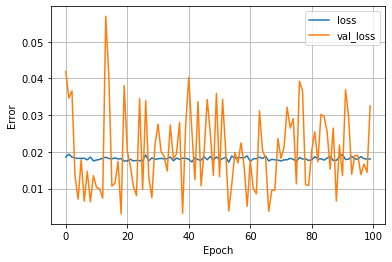

In [43]:
plot_loss(historyI0)

In [44]:
test_results = {}

test_results['res/I0'] = I0_model.evaluate(
    test_features['res/I0'],
    test_labels['dU0'], verbose=0)

In [45]:
data['res/I0'].describe()

count    4.950000e+05
mean     3.487858e+04
std      2.141744e+05
min      6.179137e-09
25%      3.361032e-05
50%      4.546730e-02
75%      6.080489e+01
max      5.435670e+06
Name: res/I0, dtype: float64

In [72]:
x = tf.linspace(0., 6000000., 101)
y = I0_model.predict(x)

In [47]:
def plot_I0(x, y):
  plt.scatter(train_features['res/I0'], train_labels['dU0'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('I0')
  plt.ylabel('dU0')
  #plt.ylim([-0.007, 0.04])
  plt.legend()

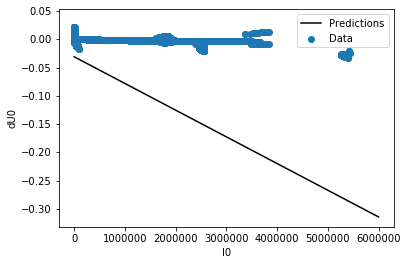

In [73]:
plot_I0(x,y)

U1 has bad correlation with dU0

In [49]:
U1 = np.array(train_features['res/U1'])
U1_normalizer = layers.Normalization(input_shape=[1,], axis=None)
U1_normalizer.adapt(U1)
U1_model = tf.keras.Sequential([
    U1_normalizer,
    layers.Dense(units=1)
])

U1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [50]:
%%time
historyU1 = U1_model.fit(
    train_features['res/U1'],
    train_labels['dU0'],
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 7min 24s, sys: 35.7 s, total: 7min 59s
Wall time: 5min 25s


In [51]:
histU1 = pd.DataFrame(historyU1.history)
histU1['epoch'] = historyU1.epoch
histU1.tail()

,loss,val_loss,epoch
95,0.018994,0.004159,95
96,0.019555,0.006923,96
97,0.019290,0.023582,97
98,0.019191,0.015917,98
99,0.020061,0.022970,99


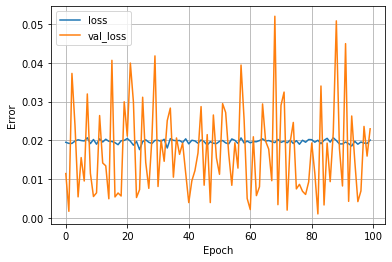

In [52]:
plot_loss(historyU1)

In [53]:
data['res/U1'].describe()

count    4.950000e+05
mean    -1.358374e-06
std      1.604593e-03
min     -8.361215e-02
25%     -7.883649e-10
50%      2.431418e-11
75%      8.537009e-10
max      8.358344e-02
Name: res/U1, dtype: float64

In [76]:
x = tf.linspace(-0.084, 0.084, 101)
y = U1_model.predict(x)

In [55]:
def plot_U1(x, y):
  plt.scatter(train_features['res/U1'], train_labels['dU0'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('U1')
  plt.ylabel('dU0')
  #plt.ylim([-0.007, 0.04])
  plt.legend()

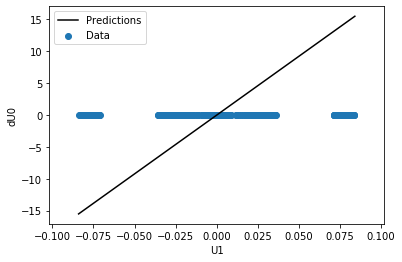

In [77]:
plot_U1(x,y)

In [57]:
test_results['res/U1'] = U1_model.evaluate(
    test_features['res/U1'],
    test_labels['dU0'], verbose=0)

In [58]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [59]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [60]:
%%time
history = linear_model.fit(
    train_features,
    train_labels['dU0'],
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 9min 42s, sys: 1min 5s, total: 10min 47s
Wall time: 6min 21s


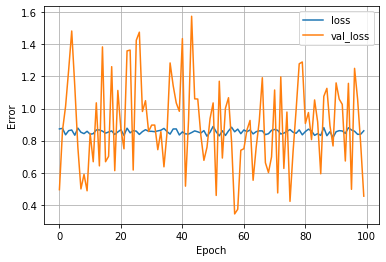

In [61]:
plot_loss(history)

In [62]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels['dU0'], verbose=0)

In [63]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [64]:
dnn_I0_model = build_and_compile_model(I0_normalizer)

In [65]:
dnn_I0_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [66]:
%%time
history = dnn_I0_model.fit(
    train_features['res/I0'],
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11min 30s, sys: 1min 21s, total: 12min 51s
Wall time: 7min 49s


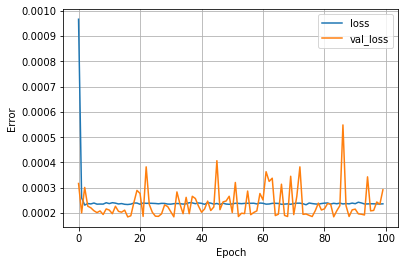

In [67]:
plot_loss(history)

In [78]:
x = tf.linspace(0., 6000000., 101)
y = dnn_I0_model.predict(x)

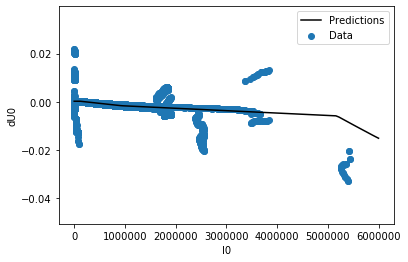

In [79]:
plot_I0(x, y)

In [81]:
test_results['dnn_I0_model'] = dnn_I0_model.evaluate(
    test_features['res/I0'], test_labels['dU0'],
    verbose=0)

In [82]:
dnn_U1_model = build_and_compile_model(U1_normalizer)

In [83]:
%%time
history = dnn_U1_model.fit(
    train_features['res/U1'],
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11min 52s, sys: 1min 22s, total: 13min 14s
Wall time: 8min 3s


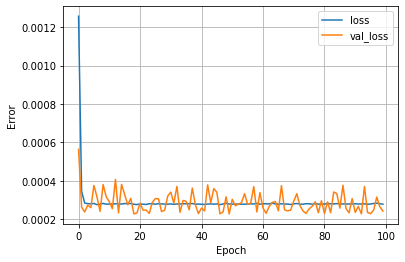

In [84]:
plot_loss(history)

In [85]:
x = tf.linspace(-0.084, 0.084, 101)
y = dnn_U1_model.predict(x)

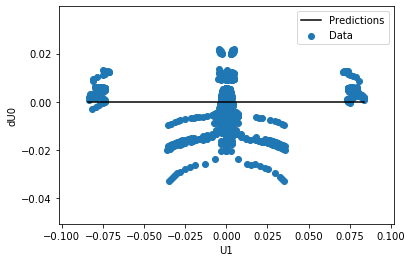

In [86]:
plot_U1(x,y)

In [89]:
test_results['dnn_U1_model'] = dnn_U1_model.evaluate(
    test_features['res/U1'], test_labels['dU0'],
    verbose=0)

In [90]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 110)              221       
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 64)                7104      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,550
Trainable params: 11,329
Non-trainable params: 221
_________________________________________________________________


In [91]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 13min 42s, sys: 1min 37s, total: 15min 19s
Wall time: 8min 40s


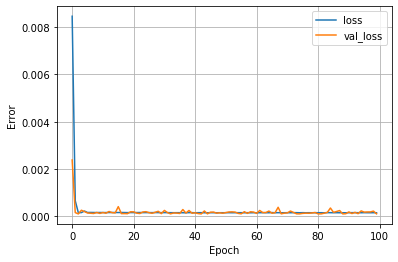

In [92]:
plot_loss(history)

In [93]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels['dU0'], verbose=0)

In [94]:
pd.DataFrame(test_results, index=['Mean absolute error [dU0]']).T

,Mean absolute error [dU0]
res/I0,0.032512
res/U1,0.023263
linear_model,0.469252
dnn_I0_model,0.000291
dnn_U1_model,0.000242
dnn_model,0.000105


In [95]:
test_predictions = dnn_model.predict(test_features).flatten()

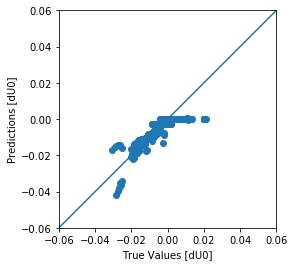

In [96]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels['dU0'], test_predictions)
plt.xlabel('True Values [dU0]')
plt.ylabel('Predictions [dU0]')
lims = [-0.06, 0.06]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

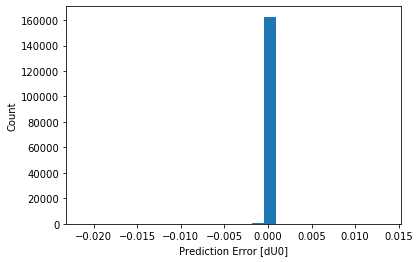

In [97]:
error = test_predictions - test_labels['dU0']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [dU0]')
_ = plt.ylabel('Count')

In [98]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [99]:
AE_model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
AE_model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [100]:
%%time
history = AE_model.fit(
    train_features,
    train_labels['dU0'],
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11min 11s, sys: 1min 15s, total: 12min 26s
Wall time: 7min 39s


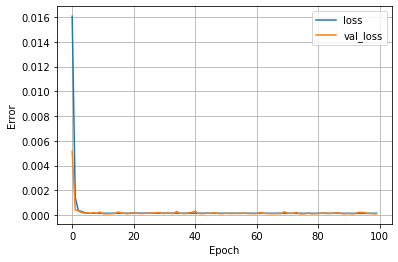

In [101]:
plot_loss(history)

In [102]:
test_results['AE_model'] = AE_model.evaluate(test_features, test_labels['dU0'], verbose=0)

In [103]:
pd.DataFrame(test_results, index=['Mean absolute error [dU0]']).T

,Mean absolute error [dU0]
res/I0,0.032512
res/U1,0.023263
linear_model,0.469252
dnn_I0_model,0.000291
dnn_U1_model,0.000242
dnn_model,0.000105
AE_model,0.000102
